In [67]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
import os
import seaborn as sns
%matplotlib inline

from statsmodels.api import tsa
from dateutil.parser import parse

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

df_train = pd.read_csv("data/train.zip")
#df_train.set_index(pd.to_datetime(df_train.day), inplace=True)

#df_train.drop('day', axis=1, inplace=True)

df_test = pd.read_csv("data/test.zip")


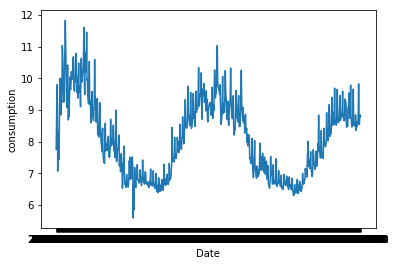

In [33]:
plt.plot( df_train['day'], df_train['consumption'])
plt.xlabel('Date')
plt.ylabel('consumption')
plt.show()

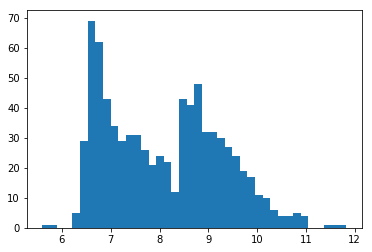

In [35]:
plt.hist((df_train['consumption']), bins=40)
plt.show()

In [51]:


df_train['day'] = pd.DatetimeIndex( df_train['day'] )

# It also expects these columns to have the names 'ds' and 'y', so we rename them accordingly
df_train = df_train.rename(columns={'day': 'ds', 'consumption': 'y'}) 
df_train.head()

,ds,y
0,2011-11-24,7.7580
1,2011-11-25,8.7385
2,2011-11-26,9.4770
3,2011-11-27,9.8030
4,2011-11-28,7.0690


In [52]:
forecast_model = Prophet( growth='linear',  weekly_seasonality=3, yearly_seasonality=3)
forecast_model.fit( df_train )

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [59]:
#df_dates = forecast_model.make_future_dataframe(periods=27,include_history=True)
#df_dates

In [68]:
df_test['day'] = pd.DatetimeIndex( df_test['day'] )
        
df_test = df_test.rename(columns={'day': 'ds', 'consumption': 'y'})
#df_test
#df_dates = forecast_model.make_future_dataframe(periods=27, 
 #                                               include_history=True)
model_predictions = forecast_model.predict( df_test )
#plot_pred = forecast_model.plot( model_predictions )
#plt.legend(loc='best', fontsize=20)
#plot_pred
model_predictions['yhat']

0     8.926292
1     9.338561
2     8.758335
3     8.643372
4     8.567371
5     8.527724
6     8.548096
7     8.821447
8     9.229703
9     8.645444
10    8.526434
11    8.446373
12    8.402660
13    8.418961
14    8.688242
15    9.092432
16    8.504117
17    8.381063
18    8.296976
19    8.249258
20    8.261583
21    8.526918
22    8.927199
23    8.335016
24    8.208139
25    8.120280
26    8.068847
Name: yhat, dtype: float64

/Users/sujay/anaconda3/envs/cspark/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Out of sample MAE = 0.272


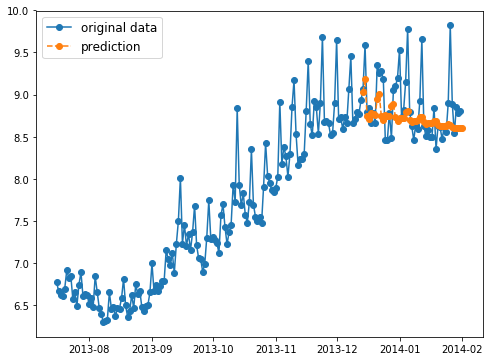

In [26]:
N=50

# divide data into training and testing:
train = df_train[:-N]
test = df_train[-N:]

# fit our AR model using the tsa module! 
ar = tsa.AR(train)

# choose the optimal lag using BIC (this is a model selection criterion, dont worry if you dont know what it is :))
optlag = ar.select_order(10, ic='bic', method='mle')

# now we fit our model with the chosen optimal lag:
arfit = ar.fit(maxlag=optlag)

# we make predictions on unseen data:
prediction = arfit.predict(end=len(df_train))[-len(test):]

# produce some figures:
plt.figure(figsize=(8, 6))
plt.plot(df_train[-200:], '-o', label="original data")
plt.plot(prediction, '--o', label='prediction')

plt.legend(fontsize=12)

print('Out of sample MAE = {0:.3f}'.format(mean_absolute_error(test, prediction)))